# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Disclaimer:** This notebook was generated by an AI assistant (Minicline) to help explore Dandiset 000690. The code and analysis have not been fully verified by human experts. Please exercise caution when interpreting the results and verify any findings independently.

## Overview of the Dandiset

Dandiset **000690** contains data from the "Allen Institute Openscope - Vision2Hippocampus project".

**Description:** *(from Dandiset metadata)*
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina? The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. Stimuli presented include simple visual motion (bars of light) and complex stimuli (movies).

**Data type:** Extracellular electrophysiology (Neuropixels probes) in mice (Mus musculus). Includes LFP data and electrode information. Some files may contain spike sorted units or imaging data.

**Link:** [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## Notebook Goals

This notebook demonstrates how to:
1.  Load basic information about the Dandiset using the DANDI Python client.
2.  Select and access a specific Neurodata Without Borders (NWB) file from the Dandiset containing ephys data.
3.  Load and view metadata associated with the NWB file, particularly electrode information.
4.  Visualize the electrode layout on the probe.
5.  Load and visualize a small segment of the Local Field Potential (LFP) data recorded by the probe.

## Required Packages

This notebook requires the following Python packages. It assumes they are already installed in your environment.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb, for HDF5 interaction)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `pandas` (for data manipulation, esp. tables)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting aesthetics)

In [1]:
# Import necessary packages
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Apply seaborn styling for plots
sns.set_theme()

print("Packages imported.")

Packages imported.


## 1. Load Dandiset Information

We can use the `dandi-cli` package to programmatically access information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "draft") # Use draft version

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset citation: {metadata['citation']}")
print(f"Description: {metadata['description'][:200]}...") # Print start of description

# List the assets in the Dandiset (optional, can be many)
# assets = list(dandiset.get_assets())
# print(f"\nFound {len(assets)} assets in the dataset")
# print("\nFirst 5 assets:")
# for asset in assets[:5]:
#     print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset citation: Mehta, Mayank R; Purandare, Chinmay; Jha, Siddharth; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Belski, Hannah; Bawany, Ahad; Carlson, Mikayla; Peene, Carter; Wilkes, Josh; Johnson, Tye; Naidoo, Robyn; Suarez, Lucas; Han, Warren; Amaya, Avalon; Nguyen, Katrina; Ouellette, Ben; Swapp, Jackie; Williford, Ali (2025) Allen Institute Openscope - Vision2Hippocampus project (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/000690/draft
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippoca...


## 2. Access a Specific NWB Ephys File

This Dandiset contains multiple NWB files, often separated by subject, session, and data type (e.g., `_ecephys.nwb`, `_image.nwb`). For this demonstration, we will load LFP data from one specific ephys file:

*   **File Path:** `sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`
*   **Asset ID:** `ba8760f9-91fe-4c1c-97e6-590bed6a783b`
*   **DANDI API URL:** `https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/`

We will stream this file directly from the DANDI Archive using `remfile` and `pynwb`.

You can also explore this specific file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft)

In [3]:
# Define the URL for the chosen NWB file
nwb_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"

# Open the remote file stream
print(f"Opening remote file: {nwb_url}")
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)

# Read the NWB file structure
# Use load_namespaces=True to ensure extensions (like EcephysProbe) are loaded
io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True)
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Session ID: {nwb.session_id}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Institution: {nwb.institution}")

Opening remote file: https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Session ID: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject Species: Mus musculus
Subject Age: P82D
Institution: Allen Institute for Brain Science


## 3. Load Electrode Information

NWB files store rich metadata about the recording electrodes, such as their location, impedance, and grouping. This information is typically stored in the `nwb.electrodes` table. We can easily convert this table to a pandas DataFrame for inspection.

In [4]:
# Access the electrodes table
if nwb.electrodes is not None:
    electrodes_df = nwb.electrodes.to_dataframe()
    print(f"Electrodes table loaded with shape: {electrodes_df.shape}")
    print("First 5 rows of the electrodes table:")
    display(electrodes_df.head())

    # Get probe information
    probe_id = nwb.electrode_groups['probeA'].probe_id
    lfp_sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate
    print(f"\nData corresponds to Probe ID: {probe_id}")
    print(f"LFP Sampling Rate: {lfp_sampling_rate} Hz")

else:
    print("No electrodes table found in this NWB file.")
    electrodes_df = None # Set to None if not found

Electrodes table loaded with shape: (95, 13)
First 5 rows of the electrodes table:


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,PF,probeA abc.EcephysElectrodeGroup at 0x14012588...,probeA,40,59,0,2,True,7465.0,3406.0,6685.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,TH,probeA abc.EcephysElectrodeGroup at 0x14012588...,probeA,80,59,0,6,True,7462.0,3371.0,6695.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,TH,probeA abc.EcephysElectrodeGroup at 0x14012588...,probeA,120,59,0,10,True,7460.0,3336.0,6706.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,TH,probeA abc.EcephysElectrodeGroup at 0x14012588...,probeA,160,59,0,14,True,7458.0,3293.0,6719.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,LP,probeA abc.EcephysElectrodeGroup at 0x14012588...,probeA,200,59,0,18,True,7456.0,3258.0,6730.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...



Data corresponds to Probe ID: 0
LFP Sampling Rate: 625.0 Hz


## 4. Visualize Electrode Positions

Using the electrode table, we can visualize the spatial layout of the electrodes on the probe shank. The table usually contains columns like `probe_horizontal_position` and `probe_vertical_position`. Coloring the points by brain region (`location`) helps understand which areas were recorded.

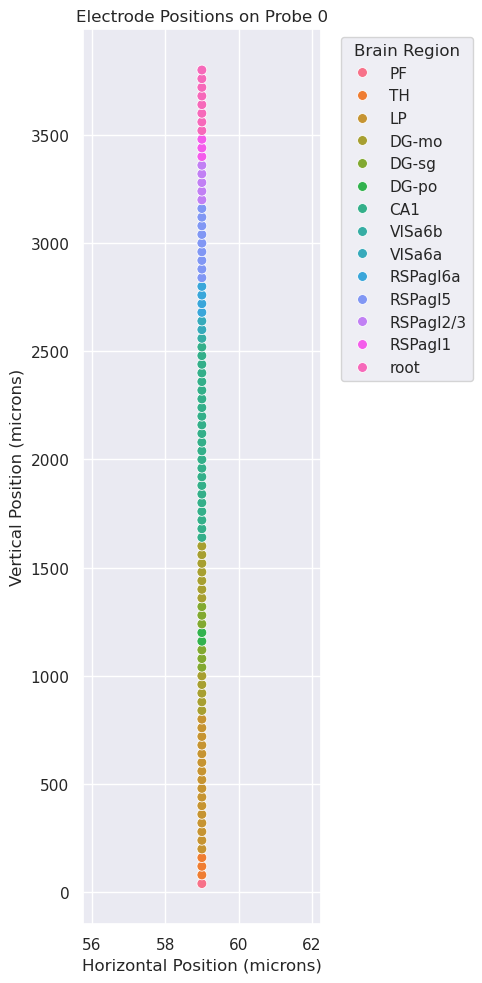

In [5]:
if electrodes_df is not None:
    plt.figure(figsize=(6, 10))
    sns.scatterplot(data=electrodes_df,
                    x='probe_horizontal_position',
                    y='probe_vertical_position',
                    hue='location', # Color points by brain region
                    s=50) # Adjust point size
    plt.title(f'Electrode Positions on Probe {probe_id}')
    plt.xlabel('Horizontal Position (microns)')
    plt.ylabel('Vertical Position (microns)')
    plt.legend(title='Brain Region', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
    plt.show() # Display the plot inline
else:
    print("Cannot plot electrode positions because electrode table was not found.")

## 5. Load and Visualize LFP Data

This NWB file contains Local Field Potential (LFP) data stored as an `ElectricalSeries` object. We can find it within the `nwb.acquisition` group. Since the full LFP data can be very large (potentially millions of time points across many channels), we will load only a small time segment from a few selected channels for visualization.

The LFP data for this probe is located at: `nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"]`

LFP data shape (timepoints, channels): (10117092, 95)
LFP timestamps shape: (10117092,)



Loading LFP data from 100.50s to 101.00s (625 samples)
Loading data for Channel IDs: [10, 26, 42]


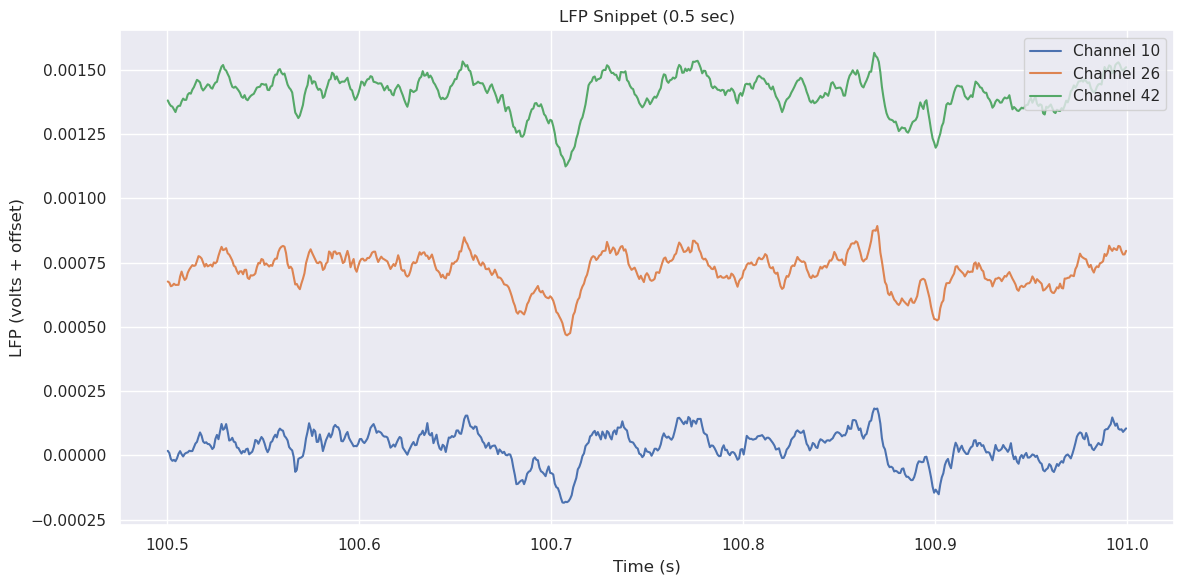

In [6]:
# Access the LFP ElectricalSeries
try:
    lfp_electrical_series = nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"]
    lfp_dataset = lfp_electrical_series.data
    lfp_timestamps_dataset = lfp_electrical_series.timestamps
    print(f"LFP data shape (timepoints, channels): {lfp_dataset.shape}")
    print(f"LFP timestamps shape: {lfp_timestamps_dataset.shape}")

    # Define time window (seconds) and channels to plot
    start_time_sec = 100.5  # Start time in seconds
    duration_sec = 0.5     # Duration to plot
    # Select a few channel IDs based on the electrodes table index
    channel_ids_to_plot = electrodes_df.index[[2, 6, 10]].tolist() # Example: IDs 2, 6, 10

    # Find corresponding indices in the datasets
    # Note: This assumes timestamps are monotonically increasing
    start_index = np.searchsorted(lfp_timestamps_dataset, start_time_sec, side='left')
    end_index = np.searchsorted(lfp_timestamps_dataset, start_time_sec + duration_sec, side='left')

    # Find column indices corresponding to channel IDs
    channel_indices = [electrodes_df.index.get_loc(ch_id) for ch_id in channel_ids_to_plot]

    print(f"\nLoading LFP data from {start_time_sec:.2f}s to {start_time_sec + duration_sec:.2f}s ({end_index - start_index} samples)")
    print(f"Loading data for Channel IDs: {channel_ids_to_plot}")

    # Load data subset (indices need to be sorted for h5py slicing)
    channel_indices_sorted = sorted(channel_indices)
    lfp_snippet = lfp_dataset[start_index : end_index, channel_indices_sorted]
    time_snippet = lfp_timestamps_dataset[start_index : end_index]

    # Reorder columns back to original request order if necessary
    # Find mapping from sorted indices back to original order
    remap_indices = [channel_indices_sorted.index(idx) for idx in channel_indices]
    lfp_snippet = lfp_snippet[:, remap_indices]


    # Plot LFP snippet
    fig, ax = plt.subplots(figsize=(12, 6))
    max_val = 0 # Keep track of max value for offset calculation
    min_val = 0 # Keep track of min value for offset calculation
    for i in range(lfp_snippet.shape[1]):
        trace = lfp_snippet[:, i]
        if i == 0: # Initialize min/max on first trace
            max_val = np.max(trace)
            min_val = np.min(trace)
        else: # Update overall min/max
            max_val = max(max_val, np.max(trace))
            min_val = min(min_val, np.min(trace))

    # Calculate offset based on overall range, apply plotting
    offset_scale = 1.5
    trace_range = max_val - min_val
    if trace_range == 0: # Avoid division by zero if data is flat
        trace_range = 1

    for i, chan_id in enumerate(channel_ids_to_plot):
        offset = trace_range * i * offset_scale
        ax.plot(time_snippet, lfp_snippet[:, i] + offset, label=f'Channel {chan_id}')

    ax.set_xlabel("Time (s)")
    ax.set_ylabel(f"LFP ({lfp_electrical_series.unit} + offset)")
    ax.set_title(f"LFP Snippet ({duration_sec} sec)")
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Could not find LFP data at the expected path: {e}")
except Exception as e:
    print(f"An error occurred while loading or plotting LFP data: {e}")

## 6. Units (Spike Data)

Exploratory analysis indicated that *this specific NWB file* (`...probe-0_ecephys.nwb`) does not contain processed spike sorting results (i.e., a `nwb.units` table). Other files within the Dandiset, perhaps those without the `_ecephys` suffix or from different probes/sessions, might contain this data.

## 7. Summary and Future Directions

This notebook demonstrated basic access and visualization for an ephys NWB file from Dandiset 000690. We successfully:
* Connected to the DANDI Archive and loaded basic Dandiset metadata.
* Streamed a specific NWB file containing LFP data.
* Accessed and visualized electrode metadata, including spatial positions and brain region mapping.
* Loaded and plotted a short snippet of LFP data from selected channels.
* Confirmed the absence of spike (`Units`) data in this particular file.

**Possible next steps for exploring this Dandiset:**
*   **Analyze other NWB files:** Explore files with `_image.nwb` suffix for imaging data, or other `_ecephys.nwb` files which might contain `Units` data.
*   **LFP Analysis:** Perform more detailed LFP analysis, such as calculating power spectral density (PSD) across different brain regions or time periods (e.g., during specific visual stimulus presentations, if stimulus timing is available in the NWB file).
*   **Correlate with Stimulus:** If stimulus presentation times are available within the NWB files, correlate neural activity (LFP or spikes, if found) with specific visual stimuli.
*   **Cross-probe analysis:** If data from multiple probes is available for the same session, compare activity across probes.

## 8. Clean Up Resources

It's important to close the file handles to release resources.

In [7]:
# Close the NWB file IO and the remote file stream
try:
    io.close()
    print("NWB IO closed.")
except NameError:
    print("NWB IO object ('io') not defined.") # In case loading failed earlier

try:
    remote_file.close()
    print("Remote file handle closed.")
except NameError:
    print("Remote file object ('remote_file') not defined.")

NWB IO closed.
Remote file handle closed.
